In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import scikeras

import keras

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')



In [2]:
import kerastuner
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.optimizers import Adam

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [4]:
# load Gas Turbines dataset
gas = pd.read_csv(r"C:\Users\hegde\Desktop\DS Ass Qst\gas_turbines.csv")

In [5]:
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [6]:
gas.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [7]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [8]:
gas.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [9]:
gas.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [10]:
numerical_features = gas.describe(include=["float64"]).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

Visualization of Data

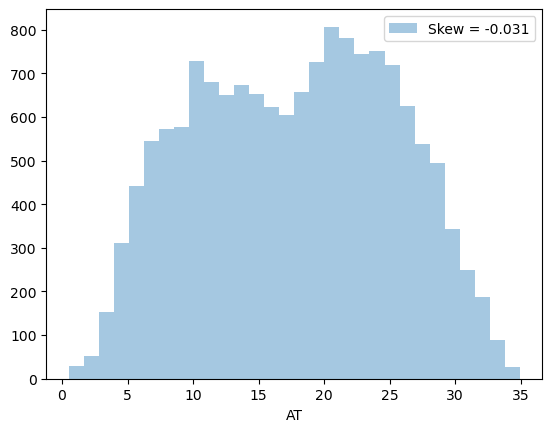

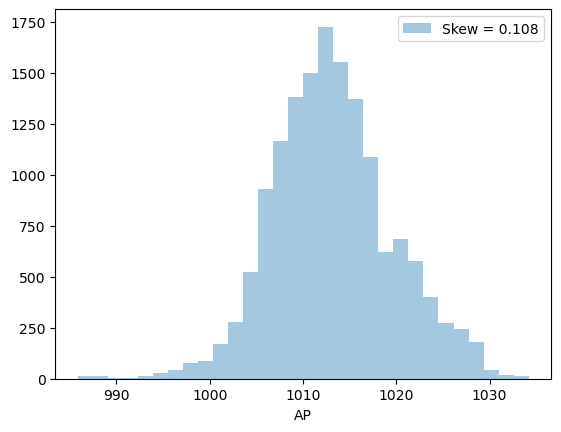

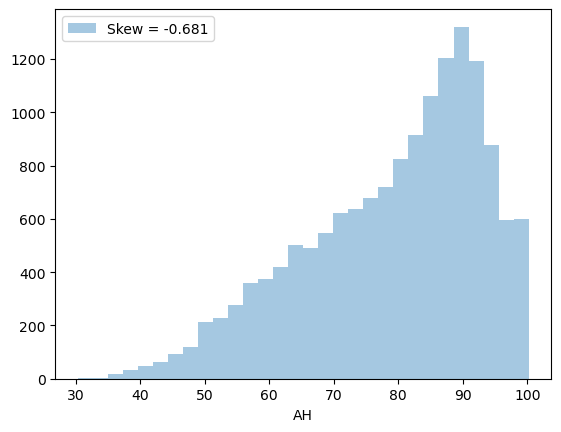

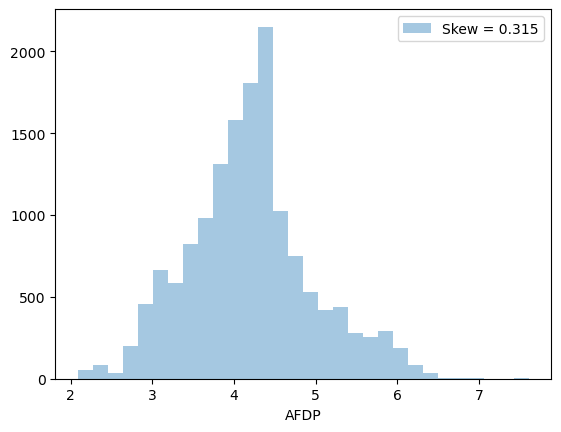

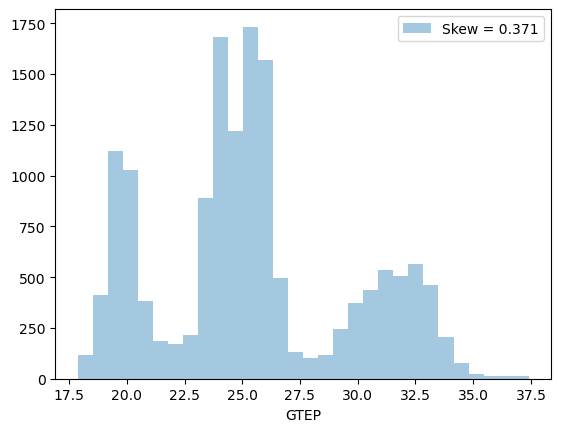

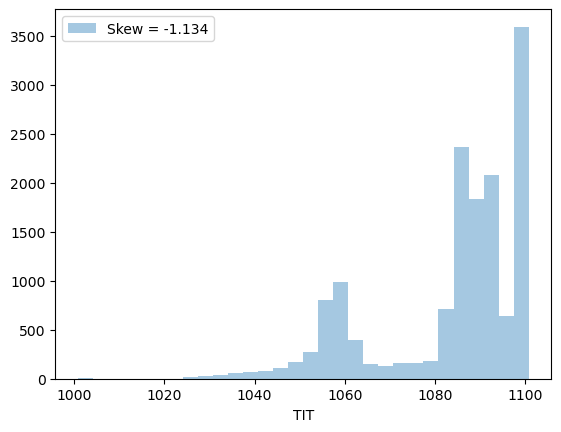

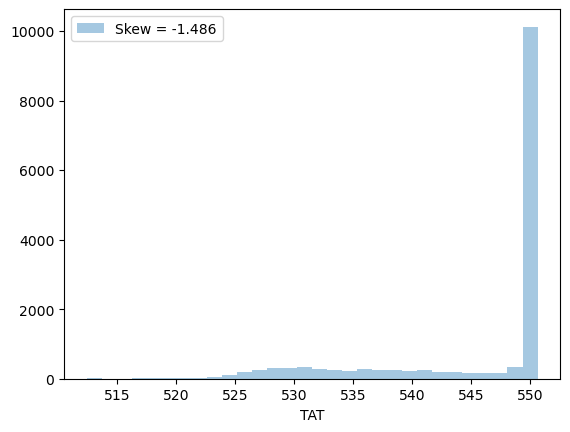

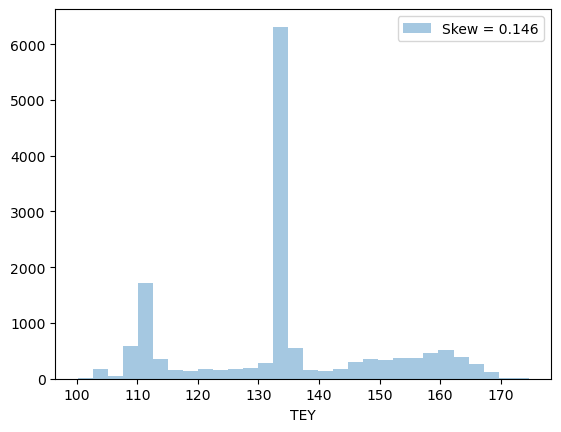

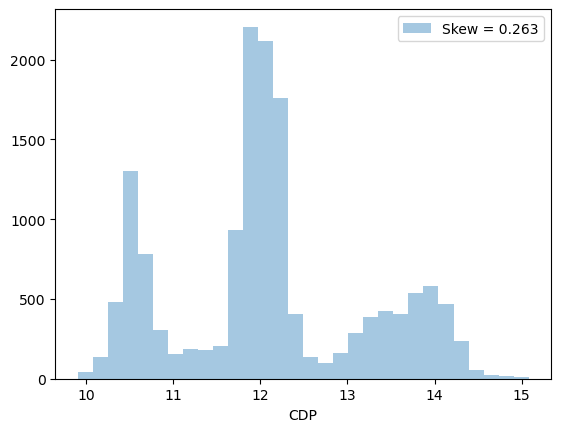

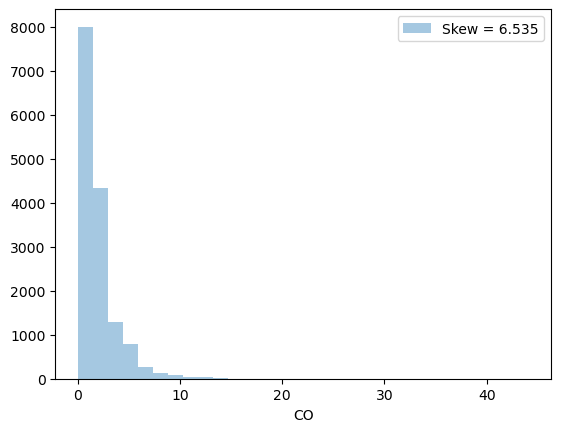

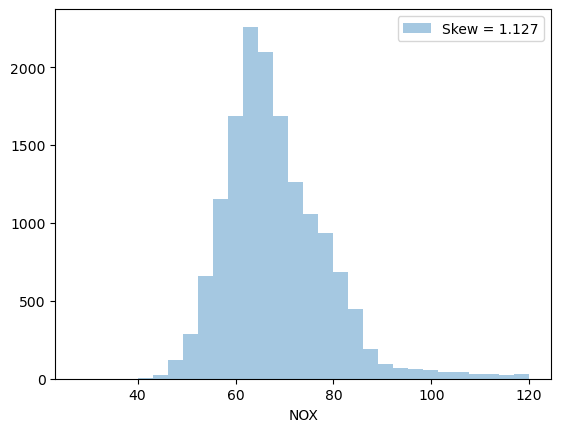

In [11]:
numerical_features=[feature for feature in gas.columns if gas[feature].dtypes != 'O']
for feat in numerical_features:
    skew = gas[feat].skew()
    sns.distplot(gas[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()


<Axes: >

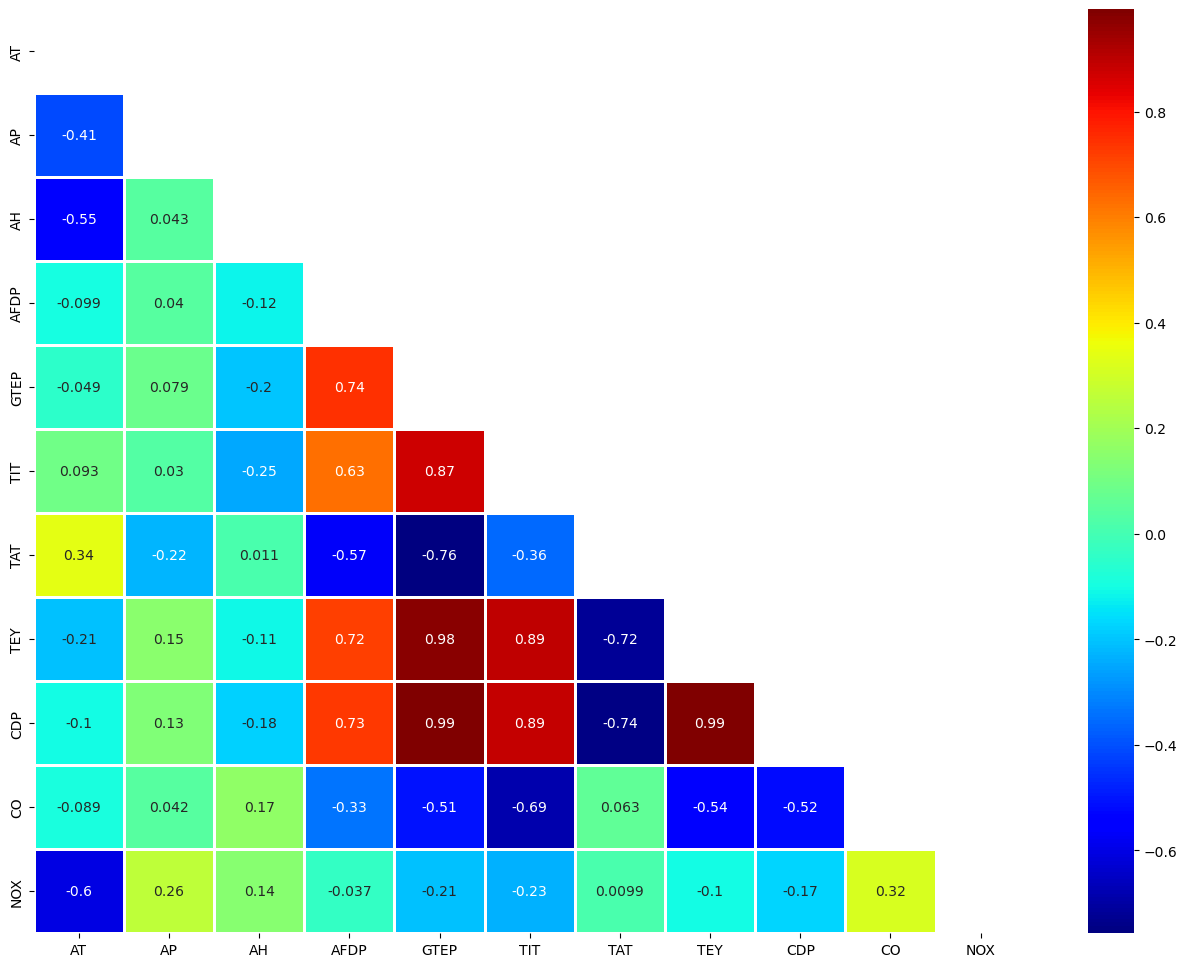

In [12]:
# Having a look at the correlation matrix

plt.figure(figsize=(16,12))
mask = np.zeros_like(gas.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=gas.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

In [13]:
X = gas.drop('TEY', axis=1)
Y = gas[["TEY"]]

Text(0.5, 1.0, 'Correlation with Turbine energy yield \n')

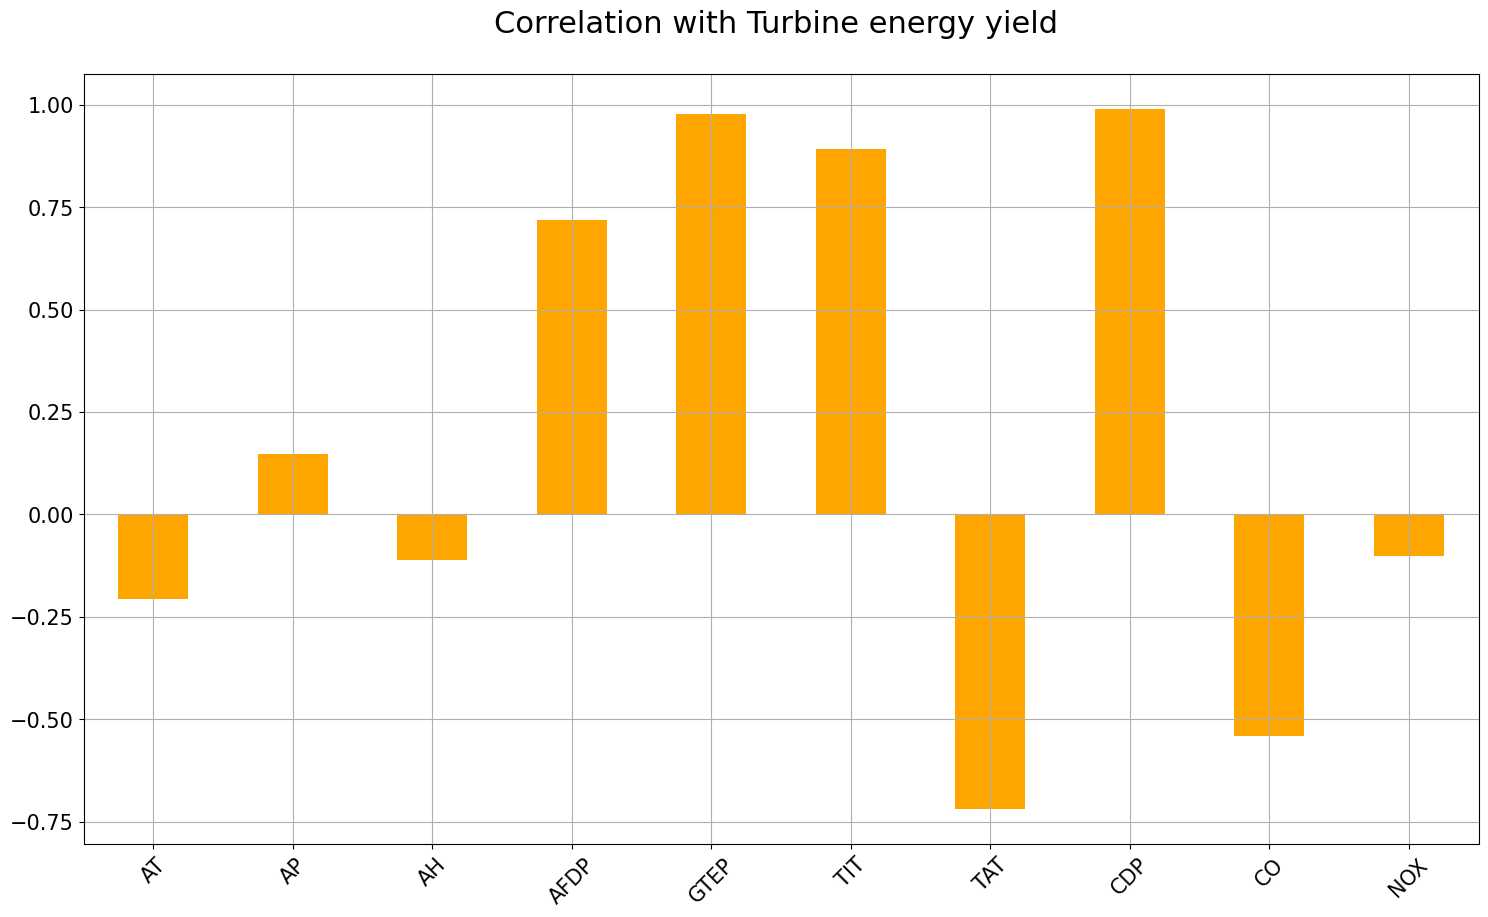

In [14]:
data2 = gas.copy()

correlations = data2.corrwith(gas.TEY)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Turbine energy yield \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

In [15]:
#Feature Selection Technique

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

#Feature importance
from numpy import set_printoptions

# feature extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(X,Y)

In [16]:
# summarize scores
scores = fit.scores_

features = fit.transform(X)

score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,1.712492,CDP
4,1.599871,GTEP
5,1.323172,TIT
6,0.892493,TAT
3,0.660659,AFDP
8,0.512887,CO
0,0.412424,AT
9,0.300909,NOX
1,0.138836,AP
2,0.097849,AH


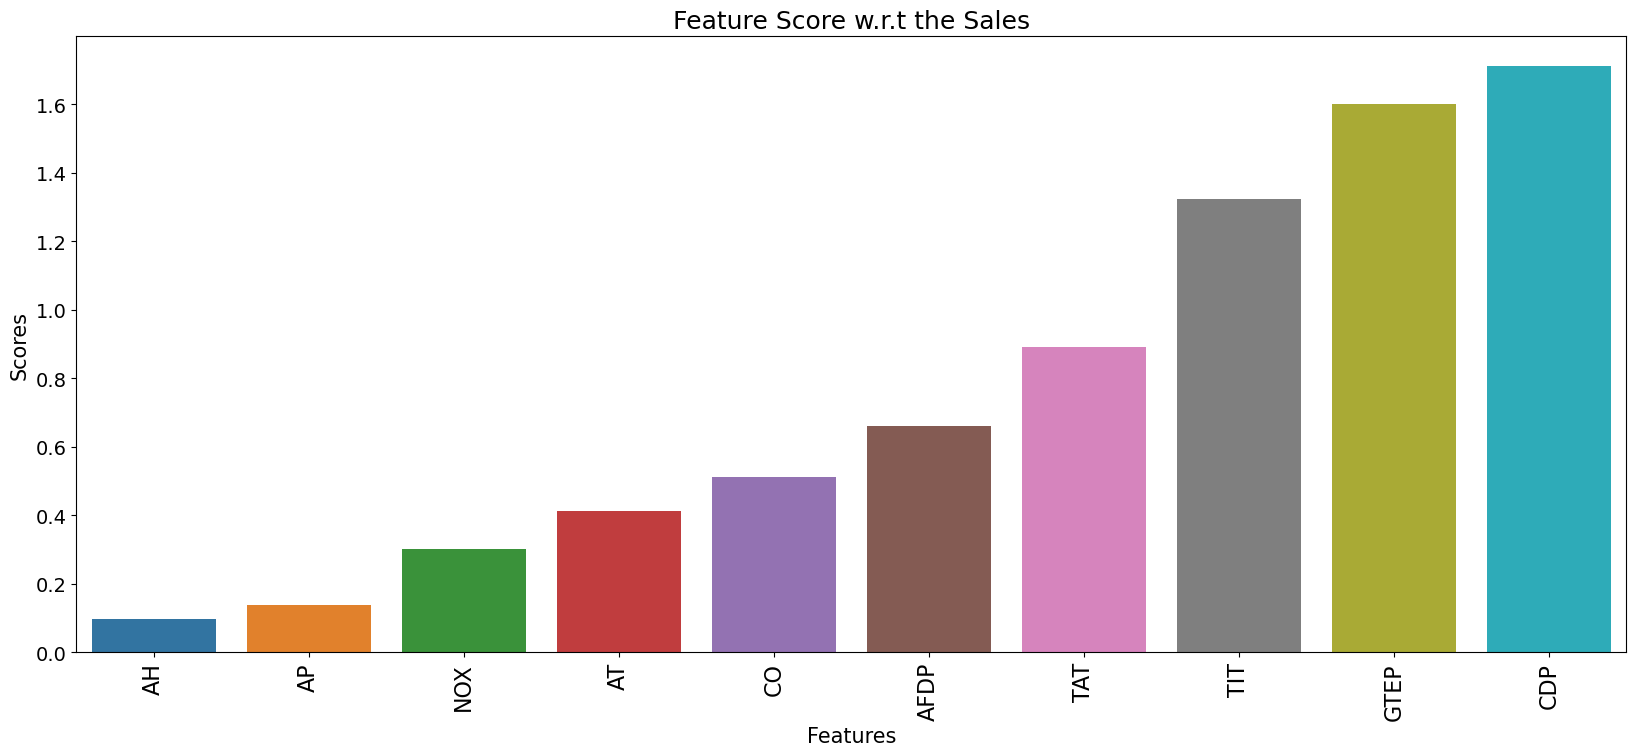

In [17]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score",
            data=score_df,
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [18]:
model_data = gas[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72


In [19]:
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 8


In [20]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,-1.357331,-1.379101,-1.488376,0.585240,-0.921232,0.532012,-1.439778,-1.231172
1,-1.363676,-1.363528,-1.482325,0.585240,-0.921495,0.568733,-1.449601,-1.229909
2,-1.360957,-1.351309,-1.476275,0.568715,-0.944385,0.552938,-1.434721,-1.230541
3,-1.356424,-1.348194,-1.464173,0.583969,-0.946884,0.548933,-1.413702,-1.229909
4,-1.350985,-1.354663,-1.458123,0.582698,-0.924389,0.574179,-1.368693,-1.229909


In [22]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 CDP     0.0
GTEP   -0.0
TIT    -0.0
TAT     0.0
AFDP    0.0
CO      0.0
AT      0.0
TEY     0.0
dtype: float64 
Standard Devaition 
 CDP     1.0
GTEP    1.0
TIT     1.0
TAT     1.0
AFDP    1.0
CO      1.0
AT      1.0
TEY     1.0
dtype: float64 1


In [23]:
# Test Train Split With Imbalanced Dataset

x = df_standard_scaled.drop('TEY',axis=1)
y = df_standard_scaled[['TEY']]

# Splitting data into test data and train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [24]:
# Hyperparameter Tuning: Optimal Learning rate ,Number of Layers and Neurons

def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model


In [25]:
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='Gas Turbine')
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [26]:
tuner.search(x_train, y_train,epochs=100,validation_data=(x_test, y_test))

Trial 5 Complete [00h 07m 46s]
val_mean_absolute_error: 0.024528410906593006

Best val_mean_absolute_error So Far: 0.024528410906593006
Total elapsed time: 00h 44m 56s


In [27]:
tuner.results_summary()

Results summary
Results in project\Gas Turbine
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 4 summary
Hyperparameters:
num_layers: 19
units_0: 64
units_1: 64
learning_rate: 0.0001
units_2: 32
units_3: 64
units_4: 64
units_5: 64
units_6: 32
units_7: 64
units_8: 96
units_9: 96
units_10: 32
units_11: 64
units_12: 64
units_13: 32
units_14: 64
units_15: 64
units_16: 96
units_17: 32
units_18: 32
Score: 0.024528410906593006

Trial 3 summary
Hyperparameters:
num_layers: 14
units_0: 64
units_1: 64
learning_rate: 0.001
units_2: 96
units_3: 96
units_4: 64
units_5: 96
units_6: 96
units_7: 96
units_8: 32
units_9: 64
units_10: 96
units_11: 32
units_12: 96
units_13: 96
units_14: 32
units_15: 96
units_16: 96
Score: 0.02474243814746539

Trial 2 summary
Hyperparameters:
num_layers: 4
units_0: 96
units_1: 96
learning_rate: 0.01
units_2: 32
units_3: 64
units_4: 32
units_5: 64
units_6: 64
units_7: 32
units_8: 64
units_9: 96
units_10: 64
units_11: 32
units_12: 32


In [28]:
# Hyperparameter Tuning: Optimal Batch_size, Number of Epochs

def create_model():
    model1 = Sequential()
    model1.add(Dense(32,input_dim=7,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(units=1,activation="linear"))

    adam=Adam(learning_rate=0.001)
    model1.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model1

model1 =KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,30,50]
epochs=[50,100,150]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

grid_result = grid.fit(x_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=50....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=50;, score=0.998 total time=  25.0s
[CV 2/5; 1/9] START batch_size=10, epochs=50....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=50;, score=0.999 total time=  25.1s
[CV 3/5; 1/9] START batch_size=10, epochs=50....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=50;, score=0.998 total time=  24.8s
[CV 4/5; 1/9] START batch_size=10, epochs=50....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=50;, score=0.998 total time=  25.2s
[CV 5/5; 1/9] START batch_size=10, epochs=50....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=50;, score=0.998 total time=  25.3s
[CV 1/5; 2/9] START batch_size=10, epochs=100...................................
[CV 1/5; 2/9] END ....batch_size=10, epochs=100;,

In [29]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9984733306256102, using {'batch_size': 30, 'epochs': 150}
0.9983230231881576,0.00015353719886773665 with {'batch_size': 10, 'epochs': 50}
0.9982352647379177,9.387101389455128e-05 with {'batch_size': 10, 'epochs': 100}
0.9984283787962571,0.00012919721383109075 with {'batch_size': 10, 'epochs': 150}
0.9983243627939787,0.00010561409745549963 with {'batch_size': 30, 'epochs': 50}
0.9980690141380892,0.00028354209803145287 with {'batch_size': 30, 'epochs': 100}
0.9984733306256102,0.00016545784478331775 with {'batch_size': 30, 'epochs': 150}
0.9982785355238157,0.0003136848612584611 with {'batch_size': 50, 'epochs': 50}
0.9984209359731704,0.00010401903209374676 with {'batch_size': 50, 'epochs': 100}
0.9983650599394416,0.00014005317112001395 with {'batch_size': 50, 'epochs': 150}


In [30]:
# Hyperparameter Tuning: Optimal Droupout rate

def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(32,input_dim=7,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(32,activation="relu"))

    model2.add(Dense(units=1,activation="linear"))

    adam=Adam(learning_rate=0.001)
    model2.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model2
dropout_rate=[0.0,0.2,0.4]
model2=KerasRegressor(build_fn=create_model,batch_size=30,epochs=150,verbose=0,dropout_rate=dropout_rate)

param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

grid_result2 = grid2.fit(x_test,y_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START dropout_rate=0.0............................................
[CV 1/5; 1/3] END .............dropout_rate=0.0;, score=0.999 total time=  26.2s
[CV 2/5; 1/3] START dropout_rate=0.0............................................
[CV 2/5; 1/3] END .............dropout_rate=0.0;, score=0.999 total time=  26.8s
[CV 3/5; 1/3] START dropout_rate=0.0............................................
[CV 3/5; 1/3] END .............dropout_rate=0.0;, score=0.998 total time=  26.6s
[CV 4/5; 1/3] START dropout_rate=0.0............................................
[CV 4/5; 1/3] END .............dropout_rate=0.0;, score=0.998 total time=  26.7s
[CV 5/5; 1/3] START dropout_rate=0.0............................................
[CV 5/5; 1/3] END .............dropout_rate=0.0;, score=0.998 total time=  26.3s
[CV 1/5; 2/3] START dropout_rate=0.2............................................
[CV 1/5; 2/3] END .............dropout_rate=0.2;,

In [31]:
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9984332037713554, using {'dropout_rate': 0.2}
0.9984099637585352,0.00012341347544971308 with {'dropout_rate': 0.0}
0.9984332037713554,0.0001722261751501394 with {'dropout_rate': 0.2}
0.9983978342442048,0.00010329502088788285 with {'dropout_rate': 0.4}


In [32]:
# Hyperparameter Tuning: Optimal Activation Function and Kernel Initializer

def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(32,input_dim=7,activation='relu'))
    model3.add(Dropout(0.2))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.2))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.2))
    model3.add(Dense(units=1,activation="linear"))

    adam=Adam(learning_rate=0.001)
    model3.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model3
activation_function=['softmax','tanh','relu']
init=['normal','uniform']
model3=KerasRegressor(build_fn=create_model,batch_size=30,epochs=150,verbose=0,activation_function=activation_function, init=init)

param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10)

grid_result3 = grid3.fit(x_test,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START activation_function=softmax, init=normal....................
[CV 1/5; 1/6] END activation_function=softmax, init=normal;, score=0.960 total time=  30.4s
[CV 2/5; 1/6] START activation_function=softmax, init=normal....................
[CV 2/5; 1/6] END activation_function=softmax, init=normal;, score=0.961 total time=  30.2s
[CV 3/5; 1/6] START activation_function=softmax, init=normal....................
[CV 3/5; 1/6] END activation_function=softmax, init=normal;, score=0.969 total time=  29.6s
[CV 4/5; 1/6] START activation_function=softmax, init=normal....................
[CV 4/5; 1/6] END activation_function=softmax, init=normal;, score=0.950 total time=  29.9s
[CV 5/5; 1/6] START activation_function=softmax, init=normal....................
[CV 5/5; 1/6] END activation_function=softmax, init=normal;, score=0.937 total time=  30.1s
[CV 1/5; 2/6] START activation_function=softmax, init=uniform..............

In [33]:
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9660148671477696, using {'activation_function': 'relu', 'init': 'normal'}
0.9554026428566706,0.010998817651067474 with {'activation_function': 'softmax', 'init': 'normal'}
0.9600374849483488,0.012773177296895156 with {'activation_function': 'softmax', 'init': 'uniform'}
0.9419591493194271,0.020463323720585312 with {'activation_function': 'tanh', 'init': 'normal'}
0.9553610861262672,0.011286193060142941 with {'activation_function': 'tanh', 'init': 'uniform'}
0.9660148671477696,0.005437072395450556 with {'activation_function': 'relu', 'init': 'normal'}
0.9463504726697675,0.006592717376639572 with {'activation_function': 'relu', 'init': 'uniform'}


In [34]:
# Standardizing only predictor variable - after train test split

model_data

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72
...,...,...,...,...,...,...,...,...
15034,10.400,19.164,1049.7,546.21,3.5421,4.5186,9.0301,111.61
15035,10.433,19.414,1046.3,543.22,3.5059,4.8470,7.8879,111.78
15036,10.483,19.530,1037.7,537.32,3.4770,7.9632,7.2647,110.19
15037,10.533,19.377,1043.2,541.24,3.4486,6.2494,7.0060,110.74


In [35]:
#assigning predictor variables to x and response variable to y
x = model_data.drop('TEY', axis=1)
y = model_data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(12031, 7)
(3008, 7)
(12031, 1)
(3008, 1)


In [36]:
# since we have continuous ouput, AF is not required in the o/p layer
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=30, validation_split=0.3, epochs=100,  verbose=1)


def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):

    #defining list of hyperparameters
    batch_size_list = [10 , 15 , 20]
    epoch_list      = [10 , 50 , 100]

    bestParamTable = pd.DataFrame()

    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:

            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')

            # Fitting the ANN to the Training set
            model.fit(x_train_scaled, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))

            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))

            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)
finalParamTable

Epoch 1/100
281/281 [==============================] - 1s 3ms/step - loss: 17178.8438 - mae: 130.0831 - mse: 17178.8438 - val_loss: 16083.6279 - val_mae: 125.8397 - val_mse: 16083.6279
Epoch 2/100
281/281 [==============================] - 1s 2ms/step - loss: 15343.3633 - mae: 122.8372 - mse: 15343.3633 - val_loss: 14549.2891 - val_mae: 119.5880 - val_mse: 14549.2891
Epoch 3/100
281/281 [==============================] - 1s 2ms/step - loss: 13901.0234 - mae: 116.8144 - mse: 13901.0234 - val_loss: 13185.2002 - val_mae: 113.7419 - val_mse: 13185.2002
Epoch 4/100
281/281 [==============================] - 1s 2ms/step - loss: 12594.2451 - mae: 111.0820 - mse: 12594.2451 - val_loss: 11935.2480 - val_mae: 108.1077 - val_mse: 11935.2480
Epoch 5/100
281/281 [==============================] - 1s 2ms/step - loss: 11390.2275 - mae: 105.5274 - mse: 11390.2275 - val_loss: 10779.2607 - val_mae: 102.6221 - val_mse: 10779.2607
Epoch 6/100
281/281 [==============================] - 1s 2ms/step - loss: 

281/281 [==============================] - 1s 2ms/step - loss: 7.1825 - mae: 1.3246 - mse: 7.1825 - val_loss: 5.6451 - val_mae: 1.1978 - val_mse: 5.6451
Epoch 48/100
281/281 [==============================] - 1s 2ms/step - loss: 5.0977 - mae: 1.1374 - mse: 5.0977 - val_loss: 3.9910 - val_mae: 1.0219 - val_mse: 3.9910
Epoch 49/100
281/281 [==============================] - 1s 2ms/step - loss: 3.7022 - mae: 0.9868 - mse: 3.7022 - val_loss: 2.9554 - val_mae: 0.8942 - val_mse: 2.9554
Epoch 50/100
281/281 [==============================] - 1s 2ms/step - loss: 2.7924 - mae: 0.8906 - mse: 2.7924 - val_loss: 2.2753 - val_mae: 0.8128 - val_mse: 2.2753
Epoch 51/100
281/281 [==============================] - 1s 2ms/step - loss: 2.1719 - mae: 0.8095 - mse: 2.1719 - val_loss: 1.8028 - val_mae: 0.7472 - val_mse: 1.8028
Epoch 52/100
281/281 [==============================] - 1s 2ms/step - loss: 1.7600 - mae: 0.7563 - mse: 1.7600 - val_loss: 1.4671 - val_mae: 0.6971 - val_mse: 1.4671
Epoch 53/100
281/

281/281 [==============================] - 1s 2ms/step - loss: 0.4275 - mae: 0.4645 - mse: 0.4275 - val_loss: 0.4270 - val_mae: 0.4692 - val_mse: 0.4270
Epoch 97/100
281/281 [==============================] - 1s 2ms/step - loss: 0.4176 - mae: 0.4571 - mse: 0.4176 - val_loss: 0.4640 - val_mae: 0.4953 - val_mse: 0.4640
Epoch 98/100
281/281 [==============================] - 1s 2ms/step - loss: 0.4272 - mae: 0.4657 - mse: 0.4272 - val_loss: 0.4196 - val_mae: 0.4664 - val_mse: 0.4196
Epoch 99/100
281/281 [==============================] - 1s 2ms/step - loss: 0.4411 - mae: 0.4710 - mse: 0.4411 - val_loss: 0.4034 - val_mae: 0.4579 - val_mse: 0.4034
Epoch 100/100
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 10 Accuracy: TEY    98.456142
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 50 Accuracy: TEY    99.682249
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 100 Accurac

,batchsize,epochs,Accuracy
0,10,10,TEY 98.456142 dtype: float64
0,10,50,TEY 99.682249 dtype: float64
0,10,100,TEY 99.634325 dtype: float64
0,15,10,TEY 89.840362 dtype: float64
0,15,50,TEY 99.67163 dtype: float64
0,15,100,TEY 99.672683 dtype: float64
0,20,10,TEY 80.943151 dtype: float64
0,20,50,TEY 99.646946 dtype: float64
0,20,100,TEY 99.674378 dtype: float64


In [37]:
finalParamTable

,batchsize,epochs,Accuracy
0,10,10,TEY 98.456142 dtype: float64
0,10,50,TEY 99.682249 dtype: float64
0,10,100,TEY 99.634325 dtype: float64
0,15,10,TEY 89.840362 dtype: float64
0,15,50,TEY 99.67163 dtype: float64
0,15,100,TEY 99.672683 dtype: float64
0,20,10,TEY 80.943151 dtype: float64
0,20,50,TEY 99.646946 dtype: float64
0,20,100,TEY 99.674378 dtype: float64


In [38]:
# Training Model - using best params, we have accuracy = 99.66994, with batch size = 15, epochs = 100

model.compile(optimizer ='adam', loss = 'mean_squared_error')
# fitting the model to best params
model.fit(x_train_scaled,y_train, batch_size=15 , epochs = 100, verbose=0)

In [39]:
# Predicting values from Model using same dataset

# generating predictions for test data
y_predict_test = model.predict(x_test_scaled)

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

94/94 [==============================] - 0s 1ms/step
(3008, 9)


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted
13312,12.219,25.762,1092.5,550.25,4.0023,1.26430,24.0930,134.46,134.429138
12627,10.791,20.085,1059.6,549.94,3.2106,2.69370,20.4500,111.88,112.719009
6393,12.126,25.221,1089.9,549.62,4.5325,1.96250,20.2620,133.72,134.151428
4990,12.218,25.965,1092.9,549.96,4.4266,1.57120,26.8620,133.79,133.796478
12462,10.466,19.688,1056.9,550.01,3.1241,2.29960,19.4090,110.77,111.285049
7405,10.624,19.387,1058.9,550.17,3.3709,4.27640,2.2158,113.32,113.609146
10993,12.088,25.392,1089.7,550.11,3.7871,0.83578,23.8520,133.77,133.690842
9488,11.498,23.225,1079.4,549.60,4.2837,2.01980,12.3950,128.98,129.385971
14201,13.971,32.518,1100.1,528.98,5.1559,0.87760,12.3590,159.42,160.919373
9757,13.862,32.105,1100.0,530.69,5.9309,10.75000,8.6376,161.86,162.050079


In [40]:
predictions_df.drop(['CDP','GTEP','TIT','TAT','AFDP','CO','AT'], axis =1 , inplace = True)

In [41]:
# Calculating Absolute Percent Error and Error


# Computing the absolute percent error
APE=100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
predictions_df['APE %']=APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  99.64918713607327


,Actual,Predicted,APE %
13312,134.46,134.429138,0.022952
12627,111.88,112.719009,0.749919
6393,133.72,134.151428,0.322636
4990,133.79,133.796478,0.004842
12462,110.77,111.285049,0.464972


In [42]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

,Actual,Predicted,APE %,Error
0,134.46,134.429138,0.022952,0.000230
1,111.88,112.719009,0.749919,-0.007499
2,133.72,134.151428,0.322636,-0.003226
3,133.79,133.796478,0.004842,-0.000048
4,110.77,111.285049,0.464972,-0.004650
...,...,...,...,...
3003,119.25,119.806412,0.466593,-0.004666
3004,133.74,133.899445,0.119220,-0.001192
3005,146.31,146.749039,0.300074,-0.003001
3006,150.07,149.555328,0.342954,0.003430


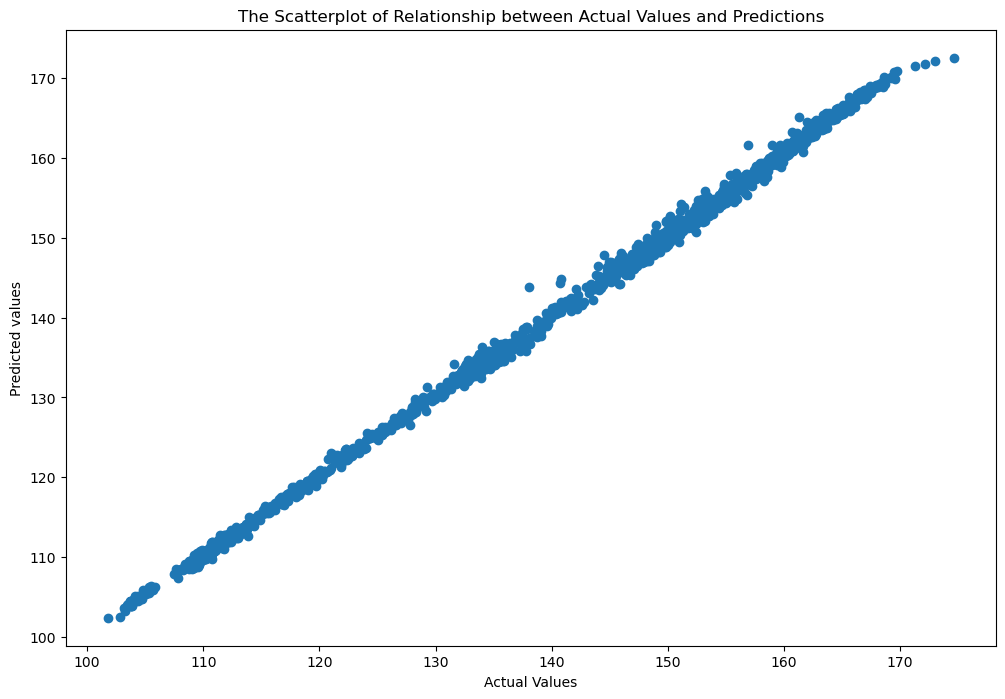

In [43]:
# Visualizing the Relationship between the Actual and Predicted ValuesModel Validation

plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [44]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score

from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_predict_test))
print ("MSE:",metrics.mean_squared_error(y_test,y_predict_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

MAE: 0.4777640143861165
MSE: 0.42020205821626905
RMSE: 0.6482299423941084


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled)
print('R2_score (train): ',r2_score(y_train, y_predict_train))
print('R2_score (test): ',r2_score(y_test, y_predict_test))

376/376 [==============================] - 0s 1ms/step
R2_score (train):  0.9986434438132599
R2_score (test):  0.9983218071817858


In [46]:
#Evaluation of  the explained variance score (R^2)

print('This shows our model predict % {} of the target correctly'.format(np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2)))

This shows our model predict % 99.87 of the target correctly


<Axes: ylabel='Density'>

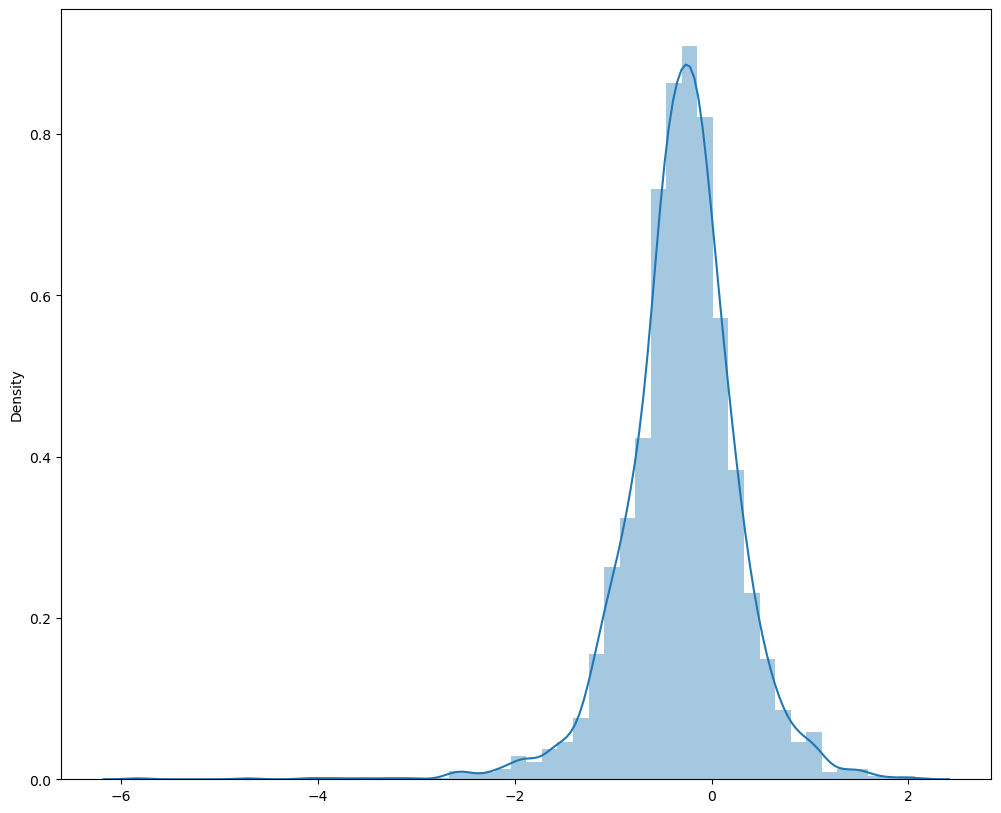

In [47]:
# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

#Now we will visualize the differences between our predictions and actual y test data

plt.figure(figsize=(12,10))
sns.distplot(y_test-y_predict_test,bins=50) #this figure also proves that our model fits very good
#There is no huge differences between our predictions and actual y data

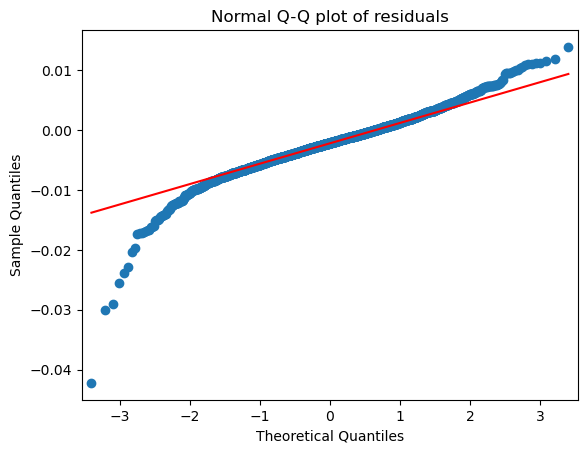

In [48]:
#Residuals values  = y - yhat

import statsmodels.api as smf
smf.qqplot(predictions_df['Error'], line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()